# 📗 Notebook 1b — Data Simulation Validation & Exploration

**Goal:**  
Generate and validate the synthetic auto insurance dataset using the reference distributions derived from Notebook 1a.

**Tasks:**
1. Environment setup and directory configuration  
2. Load and inspect the generated dataset (`simulate_data.py`)  
3. Explore key structural variables (driver, vehicle, region)  
4. Validate claim frequency and severity targets  
5. Visualize main distributions and relationships  
6. Export verified dataset for modeling steps

---

**Dataset:**  
- `data/raw/synthetic_insurance_portfolio.csv`  
Generated using the Poisson–Gamma frequency–severity simulation framework  
(see `PROJECT_SETUP.md` for parameterization and domain design).

In [1]:
# %% ===============================================================
# STEP 0 — ENVIRONMENT SETUP
# ===============================================================

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

# Directory structure
BASE_DIR = Path("..")
DATA_RAW = BASE_DIR / "data" / "raw"
OUTPUTS = BASE_DIR / "outputs" 
FIGURES = OUTPUTS / "figures"

for path in [DATA_RAW, FIGURES]:
    path.mkdir(parents=True, exist_ok=True)

print("✅ Environment setup complete.")

✅ Environment setup complete.


In [2]:
# %% ===============================================================
# STEP 1 — LOAD AND INSPECT RAW DATA
# ===============================================================

DATA_PATH = DATA_RAW / "synthetic_insurance_portfolio.csv"

df = pd.read_csv(DATA_PATH)
print(f"✅ Data loaded successfully. Shape: {df.shape}")

# Quick glance
display(df.head())

# Data types and info
df.info()

# Missing values
print("\n🔍 Missing values per column:")
display(df.isna().sum())

✅ Data loaded successfully. Shape: (100000, 20)


,policy_id,exposure,driver_age,years_licensed,vehicle_age,vehicle_type,engine_power_kw,annual_mileage_km,region,urban_density,garage,bonus_malus,prior_claims_3y,commercial_use,telematics_opt_in,sum_insured,policy_year,num_claims,total_claim_amount,avg_claim_amount
0,P0000001,1.0,34,16,10,sedan,93,13495,NW,urban,False,1.022932,0,False,False,38102.869468,2025,0,0.00,0.00
1,P0000002,1.0,50,31,8,hatchback,100,18575,NW,urban,False,0.939265,0,True,False,24193.195534,2025,0,0.00,0.00
2,P0000003,1.0,45,29,7,sedan,144,37331,NW,urban,False,0.881326,0,False,False,45956.986290,2023,0,0.00,0.00
3,P0000004,1.0,37,19,5,sedan,137,21980,NW,urban,True,0.626509,0,False,False,44152.979198,2025,0,0.00,0.00
4,P0000005,1.0,48,32,5,sedan,96,10008,NW,urban,False,0.925741,0,False,True,33456.311194,2023,1,672.73,672.73


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   policy_id           100000 non-null  object 
 1   exposure            100000 non-null  float64
 2   driver_age          100000 non-null  int64  
 3   years_licensed      100000 non-null  int64  
 4   vehicle_age         100000 non-null  int64  
 5   vehicle_type        100000 non-null  object 
 6   engine_power_kw     100000 non-null  int64  
 7   annual_mileage_km   100000 non-null  int64  
 8   region              100000 non-null  object 
 9   urban_density       100000 non-null  object 
 10  garage              100000 non-null  bool   
 11  bonus_malus         100000 non-null  float64
 12  prior_claims_3y     100000 non-null  int64  
 13  commercial_use      100000 non-null  bool   
 14  telematics_opt_in   100000 non-null  bool   
 15  sum_insured         100000 non-null

policy_id             0
exposure              0
driver_age            0
years_licensed        0
vehicle_age           0
vehicle_type          0
engine_power_kw       0
annual_mileage_km     0
region                0
urban_density         0
garage                0
bonus_malus           0
prior_claims_3y       0
commercial_use        0
telematics_opt_in     0
sum_insured           0
policy_year           0
num_claims            0
total_claim_amount    0
avg_claim_amount      0
dtype: int64

In [3]:
# %% ===============================================================
# STEP 2 — BASIC DESCRIPTIVE STATISTICS
# ===============================================================

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

desc = df[num_cols].describe().T
display(desc)

# Summary of categorical variables
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
for col in cat_cols:
    print(f"\n📊 {col}:")
    display(df[col].value_counts(normalize=True).round(3).head(10))

,count,mean,std,min,25%,50%,75%,max
exposure,100000.0,0.943368,0.142881,0.5,1.000000,1.000000,1.000000,1.00
driver_age,100000.0,39.791280,11.550919,18.0,31.750000,39.000000,47.000000,79.00
years_licensed,100000.0,22.289360,11.579125,0.0,14.000000,21.000000,29.000000,60.00
vehicle_age,100000.0,5.789230,2.399884,0.0,4.000000,6.000000,7.000000,15.00
engine_power_kw,100000.0,112.709710,36.558854,50.0,86.000000,108.000000,134.000000,261.00
annual_mileage_km,100000.0,14844.193190,7965.515533,1494.0,8743.000000,13227.000000,18932.000000,51727.00
bonus_malus,100000.0,1.000504,0.149342,0.6,0.898737,1.001002,1.101791,1.60
prior_claims_3y,100000.0,0.058890,0.252552,0.0,0.000000,0.000000,0.000000,3.00
sum_insured,100000.0,40009.388086,11968.738236,5000.0,31896.892215,40010.962173,48087.541277,80000.00
policy_year,100000.0,2023.999520,0.815786,2023.0,2023.000000,2024.000000,2025.000000,2025.00



📊 policy_id:


policy_id
P0000001    0.0
P0066651    0.0
P0066673    0.0
P0066672    0.0
P0066671    0.0
P0066670    0.0
P0066669    0.0
P0066668    0.0
P0066667    0.0
P0066666    0.0
Name: proportion, dtype: float64


📊 vehicle_type:


vehicle_type
sedan        0.320
hatchback    0.280
SUV          0.220
van          0.101
sports       0.079
Name: proportion, dtype: float64


📊 region:


region
NW    0.212
BY    0.169
BW    0.142
NI    0.103
HE    0.082
SN    0.054
RP    0.052
SH    0.035
BB    0.028
TH    0.027
Name: proportion, dtype: float64


📊 urban_density:


urban_density
suburban    0.402
urban       0.396
rural       0.203
Name: proportion, dtype: float64


📊 garage:


garage
True     0.55
False    0.45
Name: proportion, dtype: float64


📊 commercial_use:


commercial_use
False    0.92
True     0.08
Name: proportion, dtype: float64


📊 telematics_opt_in:


telematics_opt_in
False    0.799
True     0.201
Name: proportion, dtype: float64

In [4]:
# %% ===============================================================
# STEP 3 — VALIDATE FREQUENCY & SEVERITY TARGETS
# ===============================================================

# --- Portfolio KPIs (exposure-weighted) ---
freq = df["num_claims"].sum() / df["exposure"].sum()  # claims per policy-year
mean_sev = (
    df.loc[df["num_claims"] > 0, "total_claim_amount"].sum() / df["num_claims"].sum()
)  # conditional mean severity
pure_premium = df["total_claim_amount"].sum() / df["exposure"].sum()

# --- Display results ---
print(f"🚗 Claim frequency: {freq:.4f} per policy-year")
print(f"💰 Mean severity: €{mean_sev:,.0f}")
print(f"📉 Mean pure premium: €{pure_premium:,.0f}")
print(f"🧮 freq × severity: €{(freq * mean_sev):,.0f}")  # consistency check

# --- Validate against targets (GDV-based) ---
if 0.07 <= freq <= 0.09:
    print("✅ Frequency target OK")
else:
    print("⚠️ Frequency outside target range (0.07–0.09)")

if 2200 <= mean_sev <= 3200:
    print("✅ Severity target OK")
else:
    print("⚠️ Severity outside target range (2200–3200)")

if 170 <= pure_premium <= 260:
    print("✅ Pure premium target OK")
else:
    print("⚠️ Pure premium outside target range (170–260)")

🚗 Claim frequency: 0.0884 per policy-year
💰 Mean severity: €2,906
📉 Mean pure premium: €257
🧮 freq × severity: €257
✅ Frequency target OK
✅ Severity target OK
✅ Pure premium target OK


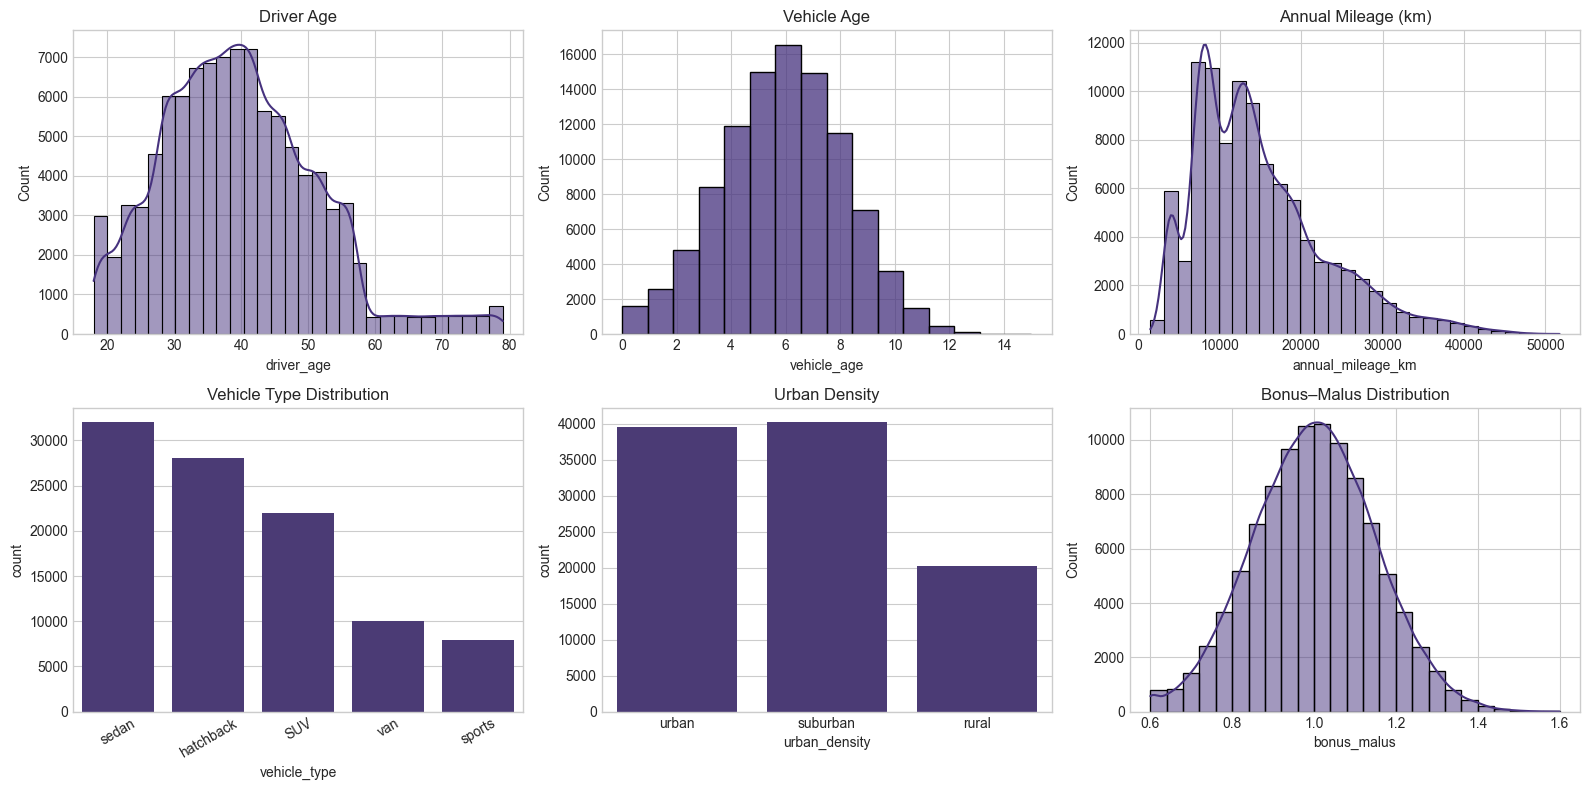

In [5]:
# %% ===============================================================
# STEP 4 — VISUALIZE KEY DISTRIBUTIONS
# ===============================================================

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.ravel()

# Use data=df and x=col to avoid passing a Series directly (typing-friendly)
sns.histplot(data=df, x="driver_age", bins=30, ax=axes[0], kde=True)
axes[0].set_title("Driver Age")

sns.histplot(data=df, x="vehicle_age", bins=16, ax=axes[1], kde=False)
axes[1].set_title("Vehicle Age")

sns.histplot(data=df, x="annual_mileage_km", bins=30, ax=axes[2], kde=True)
axes[2].set_title("Annual Mileage (km)")

sns.countplot(x="vehicle_type", data=df, ax=axes[3])
axes[3].set_title("Vehicle Type Distribution")
axes[3].tick_params(axis='x', rotation=30)

sns.countplot(x="urban_density", data=df, ax=axes[4])
axes[4].set_title("Urban Density")

sns.histplot(data=df, x="bonus_malus", bins=25, ax=axes[5], kde=True)
axes[5].set_title("Bonus–Malus Distribution")

plt.tight_layout()
plt.show()

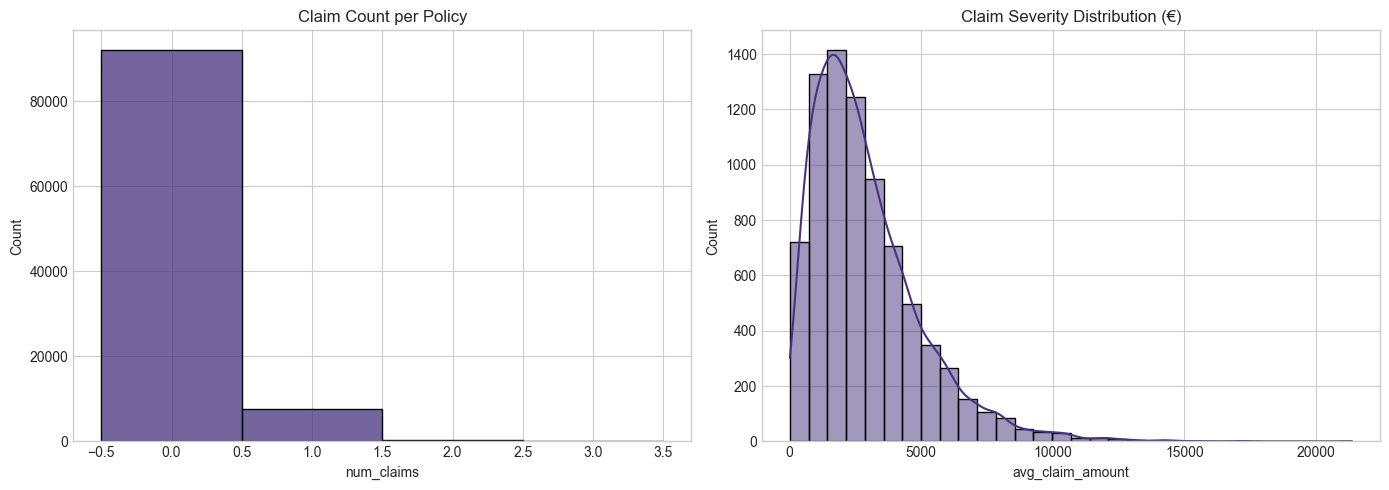

In [6]:
# %% ===============================================================
# STEP 5 — CLAIMS DISTRIBUTIONS
# ===============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# pass a DataFrame via `data=` and the column name via `x=` to satisfy seaborn typing
sns.histplot(data=df, x="num_claims", bins=range(0, int(df["num_claims"].max()) + 1), ax=axes[0], discrete=True)
axes[0].set_title("Claim Count per Policy")

sns.histplot(data=df.loc[df["num_claims"] > 0], x="avg_claim_amount", bins=30, ax=axes[1], kde=True)
axes[1].set_title("Claim Severity Distribution (€)")

plt.tight_layout()
plt.show()

In [7]:
# %% ===============================================================
# STEP 6 — SAVE BASIC SUMMARY REPORT
# ===============================================================

summary = {
    "n_policies": len(df),
    "frequency": freq,
    "mean_severity": mean_sev,
    "pure_premium": pure_premium,
}

summary_df = pd.DataFrame([summary])
summary_path = OUTPUTS / "reports" /"summary_statistics.csv"
summary_df.to_csv(summary_path, index=False)

print(f"✅ Summary saved to {summary_path}")
display(summary_df)

✅ Summary saved to ../outputs/reports/summary_statistics.csv


,n_policies,frequency,mean_severity,pure_premium
0,100000,0.088417,2905.605806,256.905798


## ✅ Summary

This notebook validated that the simulated insurance portfolio meets expected business metrics:
- **Claim frequency**: within target range (≈ 0.07–0.09)  
- **Mean severity**: within €2,200–€3,200  
- **Pure premium**: within €170–€260  

The dataset appears statistically realistic and ready for downstream modeling.

Next step:  
👉 Proceed to `02_exploration.ipynb` for correlation analysis and feature importance review.